# Project: Explanatory Data Analysis & Data Presentation (Movies Dataset)

# Project Brief for Self-Coders

## Data Import and first Inspection

1. __Importing__ the movies dataset from the CSV file "movies_complete.csv". __Inspect__ the data.

__Some additional information on Features/Columns__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('movies_complete.csv' , parse_dates = ['release_date'])

df.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [5]:
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
std,111806.36,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89
min,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00


### Data distribution of numerical features, of course id doesn't matter.

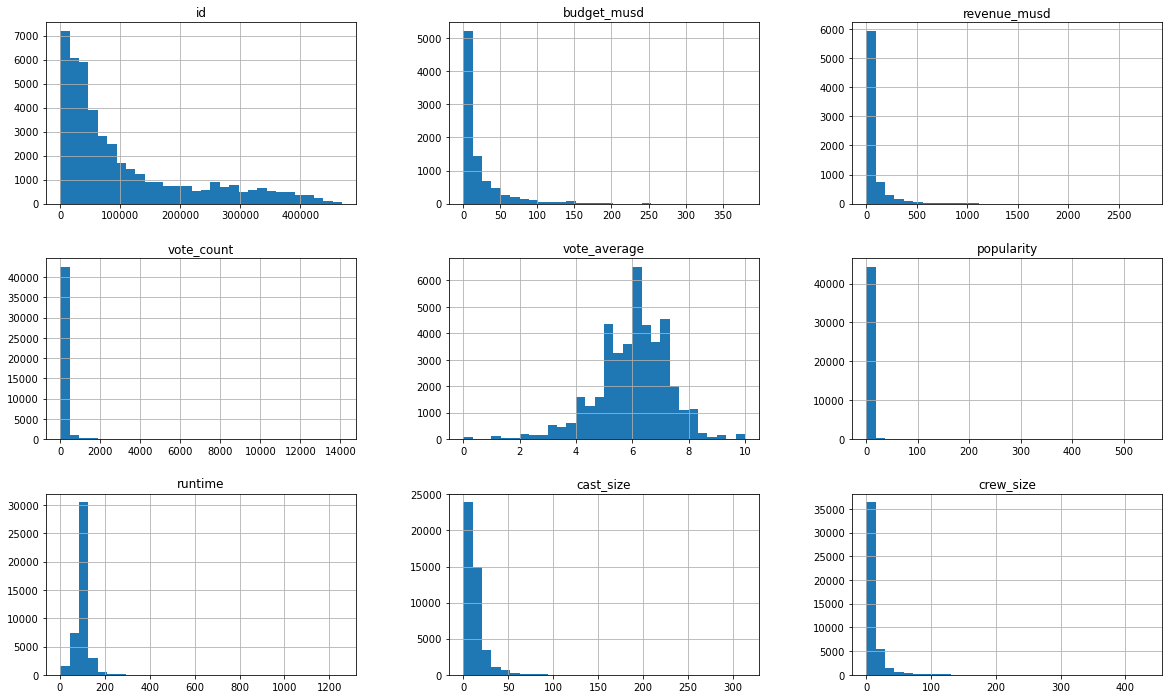

In [6]:
df.hist(figsize=(20,12),bins=30);

### Investigating the most commom budgets and their range

In [7]:
df.budget_musd.value_counts(dropna=False,ascending=False)

nan      35837
5.00       286
10.00      258
20.00      243
2.00       241
         ...  
1.20         1
1.25         1
10.92        1
0.07         1
6.85         1
Name: budget_musd, Length: 1219, dtype: int64

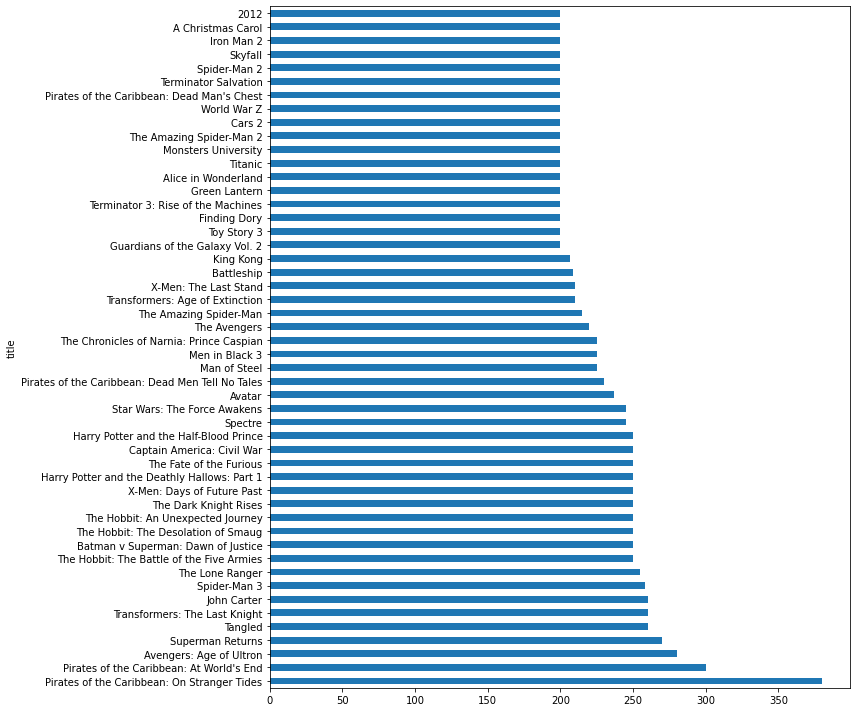

In [8]:
plt.figure(figsize=(12,10))
df.set_index('title').budget_musd.sort_values(ascending=False).head(50).plot.barh();
plt.tight_layout()

In [9]:
df.vote_average.value_counts(dropna=False,ascending=False)

nan     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
9.80       1
0.70       1
1.10       1
9.60       1
Name: vote_average, Length: 93, dtype: int64

In [10]:
df.vote_count.value_counts()

1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
4461.00       1
1085.00       1
1539.00       1
2487.00       1
3086.00       1
Name: vote_count, Length: 1820, dtype: int64

In [11]:
df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [12]:
df = df.drop_duplicates()

In [13]:
df.describe(include='object')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [14]:
df.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
44686          NaT
44687   2011-11-17
44688   2003-08-01
44689   1917-10-21
44690   2017-06-09
Name: release_date, Length: 44691, dtype: datetime64[ns]

In [15]:
df.loc[ df.title == 'Cinderella' , ['title','release_date'] ]

,title,release_date
984,Cinderella,1950-03-04
12988,Cinderella,1997-11-02
23254,Cinderella,1914-12-28
23265,Cinderella,2002-08-06
28073,Cinderella,2011-10-30
28340,Cinderella,2015-03-12
33805,Cinderella,1947-11-28
35114,Cinderella,1957-03-31
35116,Cinderella,2000-01-01
40439,Cinderella,1899-10-01


In [16]:
df.sort_values(by='release_date',ascending=True)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
34472,315946,Passage of Venus,NaN,1874-12-09,Documentary,NaN,xx,nan,nan,NaN,France,19.00,6.00,0.48,1.00,Photo sequence of the rare transit of Venus ov...,No Language,<img src='http://image.tmdb.org/t/p/w185//kX6H...,NaN,0,2,P.J.C. Janssen
34469,194079,Sallie Gardner at a Gallop,NaN,1878-06-14,Documentary,NaN,en,nan,nan,Palo Alto Stock Farm,United States of America,25.00,6.20,0.33,1.00,Sallie Gardner at a Gallop was one of the earl...,No Language,<img src='http://image.tmdb.org/t/p/w185//2E2x...,Sallie Gardner|Gilbert Domm,2,3,Eadweard Muybridge
40956,426903,Buffalo Running,NaN,1883-11-19,Documentary,NaN,en,nan,nan,NaN,United States of America,7.00,5.40,0.23,1.00,Individual photographs of the running of a buf...,No Language,<img src='http://image.tmdb.org/t/p/w185//b0Z1...,NaN,0,2,Eadweard Muybridge
34465,159897,Man Walking Around a Corner,NaN,1887-08-18,Documentary,NaN,xx,nan,nan,NaN,United States of America,17.00,4.10,1.18,1.00,The last remaining production of Le Prince's L...,No Language,<img src='http://image.tmdb.org/t/p/w185//3vIp...,NaN,0,2,Louis Aimé Augustin Le Prince
34466,96882,Accordion Player,NaN,1888-01-01,Documentary,NaN,xx,nan,nan,Whitley Partners,United Kingdom,18.00,4.40,0.21,1.00,The last remaining film of Le Prince's LPCCP T...,No Language,<img src='http://image.tmdb.org/t/p/w185//5dqO...,Adolphe Le Prince,1,1,Louis Aimé Augustin Le Prince
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43347,452922,Supermassive Black Holes,NaN,NaT,Documentary,NaN,ru,nan,nan,NaN,United Kingdom,1.00,7.00,0.05,nan,NaN,English,<img src='http://image.tmdb.org/t/p/w185//zwyb...,John Shrapnel,1,1,NaN
43571,456956,Neither Wolf Nor Dog,The World is Not an Accident. We Don't Always ...,NaT,Drama,NaN,en,nan,nan,NaN,NaN,1.00,10.00,0.00,110.00,A white author is sucked into a road trip thro...,NaN,<img src='http://image.tmdb.org/t/p/w185//ghNf...,Chief Dave Beautiful Bald Eagle|Christopher Sw...,11,5,Steven Lewis Simpson
44053,425916,Salad Fingers,NaN,NaT,Animation|Horror|Science Fiction,NaN,en,nan,nan,NaN,United Kingdom,4.00,8.50,0.14,52.00,"The adventures of Salad Fingers, an unspecifie...",English,<img src='http://image.tmdb.org/t/p/w185//xQEW...,David Firth,1,1,NaN
44436,433711,All Superheroes Must Die 2: The Last Superhero,NaN,NaT,Mystery|Science Fiction,NaN,en,nan,nan,NaN,NaN,1.00,4.00,0.00,74.00,"In a no holds barred documentary, acclaimed jo...",English,<img src='http://image.tmdb.org/t/p/w185//pNYy...,Tallay Wickham|Jason Trost,2,1,Jason Trost


## The best and the worst movies

2. __Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 10 or more Ratings)
- Lowest Rating (only movies with 10 or more Ratings)
- Highest Popularity

### Creating a new subset based only on the features for the tasks

In [17]:
df_best = df[[ 'poster_path' , 'title' , 'budget_musd' , 'revenue_musd' , 'vote_count' , 'vote_average' , 'popularity' ]].copy()

df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,nan,76.58,173.00,5.70,8.39
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,nan,nan,1.00,4.00,0.07
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,nan,nan,3.00,9.00,0.18
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,nan,nan,6.00,3.80,0.90
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,nan,nan,0.00,nan,0.00


In [18]:
df_best['profit'] = df_best.revenue_musd - df_best.budget_musd

df_best['profit']

0       343.55
1       197.80
2          nan
3        65.45
4          nan
         ...  
44686      nan
44687      nan
44688      nan
44689      nan
44690      nan
Name: profit, Length: 44691, dtype: float64

In [19]:
df.dtypes

id                                int64
title                            object
tagline                          object
release_date             datetime64[ns]
genres                           object
belongs_to_collection            object
original_language                object
budget_musd                     float64
revenue_musd                    float64
production_companies             object
production_countries             object
vote_count                      float64
vote_average                    float64
popularity                      float64
runtime                         float64
overview                         object
spoken_languages                 object
poster_path                      object
cast                             object
cast_size                         int64
crew_size                         int64
director                         object
dtype: object

In [20]:
df_best['return'] = df_best.revenue_musd / df_best.budget_musd

In [21]:
df_best.columns = ['','title','budget','revenue','votes','average_rating' , 'popularity' , 'profit' , 'return']

In [22]:
df_best

,,title,budget,revenue,votes,average_rating,popularity,profit,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,nan,nan,92.00,6.50,11.71,nan,nan
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,nan,76.58,173.00,5.70,8.39,nan,nan
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,nan,nan,1.00,4.00,0.07,nan,nan
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,nan,nan,3.00,9.00,0.18,nan,nan
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,nan,nan,6.00,3.80,0.90,nan,nan
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,nan,nan,0.00,nan,0.00,nan,nan


In [23]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [24]:
subset = df_best.iloc[:5,:2]

subset

,,title
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II


In [25]:
from IPython.display import HTML

In [26]:
HTML(subset.to_html(escape=False))

,,title
0,,Toy Story
1,,Jumanji
2,,Grumpier Old Men
3,,Waiting to Exhale
4,,Father of the Bride Part II


In [27]:
df_best.set_index('title',inplace=True)

In [28]:
df_best.sort_values(by='average_rating',ascending=False)

,,budget,revenue,votes,average_rating,popularity,profit,return
title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,nan,nan,1.00,10.00,0.04,nan,nan
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,nan,nan,1.00,10.00,0.32,nan,nan
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,nan,nan,1.00,10.00,0.04,nan,nan
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,nan,nan,1.00,10.00,1.78,nan,nan
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,nan,nan,2.00,10.00,0.48,nan,nan
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78...,nan,nan,0.00,nan,0.00,nan,nan
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX...,nan,nan,0.00,nan,0.09,nan,nan
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4...,nan,nan,0.00,nan,0.01,nan,nan


In [29]:
df_best.sort_values(by='return',ascending=False)

,,budget,revenue,votes,average_rating,popularity,profit,return
title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,nan,nan,1.00,4.00,0.07,nan,nan
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,nan,nan,3.00,9.00,0.18,nan,nan
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,nan,nan,6.00,3.80,0.90,nan,nan


In [30]:
df_best.loc[ df_best.budget >= 5 ].sort_values(by='return',ascending=False)

,,budget,revenue,votes,average_rating,popularity,profit,return
title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.00,368.74,686.00,6.20,6.72,363.74,73.75
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.00,328.20,512.00,6.30,7.79,323.20,65.64
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.50,nan,3.00,4.00,0.88,nan,nan
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.00,nan,67.00,7.30,9.80,nan,nan
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.40,nan,153.00,5.30,5.61,nan,nan


In [31]:
df_best.budget.fillna(0,inplace=True)
df_best.votes.fillna(0,inplace=True)

In [32]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   budget          44691 non-null  float64
 2   revenue         7385 non-null   float64
 3   votes           44691 non-null  float64
 4   average_rating  42077 non-null  float64
 5   popularity      44691 non-null  float64
 6   profit          5371 non-null   float64
 7   return          5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [33]:
def best_worst( n , by , ascending = False , min_bud = 0 , min_votes = 0):
    
    df2 = df_best.loc[ (df_best.budget >= min_bud) & (df_best.votes >= min_votes) , ['',by] ].sort_values(by=by , ascending = ascending).head(n).copy()
    
    return HTML(df2.to_html(escape=False))

__Defining__ an appropriate __user-defined function__ to reuse code.

__Movies Top 5 - Highest Revenue__

In [34]:
best_worst(n=5,by='revenue',min_bud=5,min_votes=5)

,,revenue
title,,
Avatar,,2787.97
Star Wars: The Force Awakens,,2068.22
Titanic,,1845.03
The Avengers,,1519.56
Jurassic World,,1513.53


__Movies Top 5 - Highest Budget__

In [35]:
best_worst(n=5,by='budget',min_bud=5,min_votes=5)

,,budget
title,,
Pirates of the Caribbean: On Stranger Tides,,380.00
Pirates of the Caribbean: At World's End,,300.00
Avengers: Age of Ultron,,280.00
Superman Returns,,270.00
John Carter,,260.00


__Movies Top 5 - Highest Profit__

In [36]:
best_worst(n=5,by='profit',min_bud=5,min_votes=5)

,,profit
title,,
Avatar,,2550.97
Star Wars: The Force Awakens,,1823.22
Titanic,,1645.03
Jurassic World,,1363.53
Furious 7,,1316.25


__Movies Top 5 - Lowest Profit__

In [37]:
best_worst(n=5,by='profit',ascending='True',min_bud=5,min_votes=5)

,,profit
title,,
The Lone Ranger,,-165.71
The Alamo,,-119.18
Mars Needs Moms,,-111.01
Valerian and the City of a Thousand Planets,,-107.45
The 13th Warrior,,-98.30


__Movies Top 5 - Highest ROI__

In [38]:
best_worst(n=5,by='return',min_bud=5,min_votes=5)

,,return
title,,
E.T. the Extra-Terrestrial,,75.52
My Big Fat Greek Wedding,,73.75
Star Wars,,70.49
Jaws,,67.24
Crocodile Dundee,,65.64


__Movies Top 5 - Lowest ROI__

In [39]:
best_worst(n=5,by='return',ascending=True,min_bud=5,min_votes=5)

,,return
title,,
Chasing Liberty,,0.00
The Cookout,,0.00
Never Talk to Strangers,,0.00
Deadfall,,0.00
In the Cut,,0.00


__Movies Top 5 - Most Votes__

In [40]:
best_worst(n=5,by='votes',ascending=False,min_bud=5,min_votes=5)

,,votes
title,,
Inception,,14075.00
The Dark Knight,,12269.00
Avatar,,12114.00
The Avengers,,12000.00
Deadpool,,11444.00


__Movies Top 5 - Highest Rating__

In [41]:
best_worst(n=5,by='average_rating',ascending=False,min_bud=5,min_votes=5)

,,average_rating
title,,
Dilwale Dulhania Le Jayenge,,9.10
Human,,8.60
The Shawshank Redemption,,8.50
The Godfather,,8.50
Spirited Away,,8.30


__Movies Top 5 - Lowest Rating__

In [42]:
best_worst(n=5,by='average_rating',ascending=True,min_bud=5,min_votes=5)

,,average_rating
title,,
Black Rose,,2.00
Foodfight!,,2.30
Drona,,2.60
Cougar Hunting,,2.60
Dieter - The Movie,,2.70


__Movies Top 5 - Most Popular__

In [43]:
best_worst(n=5,by='popularity',ascending=False,min_bud=5,min_votes=5)

,,popularity
title,,
Minions,,547.49
Wonder Woman,,294.34
Beauty and the Beast,,287.25
Baby Driver,,228.03
Big Hero 6,,213.85


## Finding the next Movie

3. __Filtering__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

### This task will be done in 3 fashions

### 1st Fashion

In [44]:
bruce_science_fiction = df[ df.cast.str.contains('Bruce Willis') & df.genres.str.contains('Science Fiction') ]

bruce_science_fiction[ bruce_science_fiction.genres.str.contains('Action') ]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
1448,18,The Fifth Element,There is no future without it.,1997-05-07,Adventure|Fantasy|Action|Thriller|Science Fiction,NaN,en,90.00,263.92,Columbia Pictures|Gaumont,France,3962.00,7.30,24.31,126.00,"In 2257, a taxi driver is unintentionally give...",English|svenska|Deutsch,<img src='http://image.tmdb.org/t/p/w185//fPtl...,Bruce Willis|Gary Oldman|Ian Holm|Milla Jovovi...,114,134,Luc Besson
1786,95,Armageddon,The Earth's Darkest Day Will Be Man's Finest Hour,1998-07-01,Action|Thriller|Science Fiction|Adventure,NaN,en,140.00,553.80,Jerry Bruckheimer Films|Touchstone Pictures|Va...,United States of America,2540.00,6.50,13.24,151.00,When an asteroid threatens to collide with Ear...,English|Pусский,<img src='http://image.tmdb.org/t/p/w185//fMtO...,Bruce Willis|Billy Bob Thornton|Ben Affleck|Li...,67,108,Michael Bay
14135,19959,Surrogates,How do you save humanity when the only thing t...,2009-09-24,Action|Science Fiction|Thriller,NaN,en,80.00,122.44,Touchstone Pictures|Mandeville Films|Wintergre...,United States of America,1219.00,5.90,16.21,89.00,Set in a futuristic world where humans live in...,English|Français,<img src='http://image.tmdb.org/t/p/w185//v3Z0...,Bruce Willis|Radha Mitchell|Rosamund Pike|Jame...,44,25,Jonathan Mostow
19218,59967,Looper,"Hunted By Your Future, Haunted By Your Past",2012-09-26,Action|Thriller|Science Fiction,NaN,en,30.00,47.04,Endgame Entertainment|FilmDistrict|DMG Enterta...,China|United States of America,4777.00,6.60,12.73,118.00,"In the futuristic action thriller Looper, time...",English,<img src='http://image.tmdb.org/t/p/w185//sNjL...,Joseph Gordon-Levitt|Bruce Willis|Emily Blunt|...,34,42,Rian Johnson
20333,72559,G.I. Joe: Retaliation,NaN,2013-03-26,Adventure|Action|Science Fiction|Thriller,G.I. Joe (Live-Action) Collection,en,130.00,371.88,Paramount Pictures|Di Bonaventura Pictures|Has...,United States of America,3045.00,5.40,10.56,110.00,"Framed for crimes against the country, the G.I...",English,<img src='http://image.tmdb.org/t/p/w185//3rWI...,Dwayne Johnson|D.J. Cotrona|Adrianne Palicki|B...,20,28,Jon M. Chu
27619,307663,Vice,Where the future is your past.,2015-01-16,Thriller|Science Fiction|Action|Adventure,NaN,en,10.00,nan,Grindstone Entertainment Group|K5 Internationa...,United States of America,245.00,4.10,19.24,96.00,Julian Michaels has designed the ultimate reso...,English,<img src='http://image.tmdb.org/t/p/w185//nPqN...,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,51,56,Brian A Miller


In [45]:
bruce_science_fiction[ bruce_science_fiction.genres.str.contains('Action') ].sort_values(by='vote_average',ascending=False)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
1448,18,The Fifth Element,There is no future without it.,1997-05-07,Adventure|Fantasy|Action|Thriller|Science Fiction,NaN,en,90.00,263.92,Columbia Pictures|Gaumont,France,3962.00,7.30,24.31,126.00,"In 2257, a taxi driver is unintentionally give...",English|svenska|Deutsch,<img src='http://image.tmdb.org/t/p/w185//fPtl...,Bruce Willis|Gary Oldman|Ian Holm|Milla Jovovi...,114,134,Luc Besson
19218,59967,Looper,"Hunted By Your Future, Haunted By Your Past",2012-09-26,Action|Thriller|Science Fiction,NaN,en,30.00,47.04,Endgame Entertainment|FilmDistrict|DMG Enterta...,China|United States of America,4777.00,6.60,12.73,118.00,"In the futuristic action thriller Looper, time...",English,<img src='http://image.tmdb.org/t/p/w185//sNjL...,Joseph Gordon-Levitt|Bruce Willis|Emily Blunt|...,34,42,Rian Johnson
1786,95,Armageddon,The Earth's Darkest Day Will Be Man's Finest Hour,1998-07-01,Action|Thriller|Science Fiction|Adventure,NaN,en,140.00,553.80,Jerry Bruckheimer Films|Touchstone Pictures|Va...,United States of America,2540.00,6.50,13.24,151.00,When an asteroid threatens to collide with Ear...,English|Pусский,<img src='http://image.tmdb.org/t/p/w185//fMtO...,Bruce Willis|Billy Bob Thornton|Ben Affleck|Li...,67,108,Michael Bay
14135,19959,Surrogates,How do you save humanity when the only thing t...,2009-09-24,Action|Science Fiction|Thriller,NaN,en,80.00,122.44,Touchstone Pictures|Mandeville Films|Wintergre...,United States of America,1219.00,5.90,16.21,89.00,Set in a futuristic world where humans live in...,English|Français,<img src='http://image.tmdb.org/t/p/w185//v3Z0...,Bruce Willis|Radha Mitchell|Rosamund Pike|Jame...,44,25,Jonathan Mostow
20333,72559,G.I. Joe: Retaliation,NaN,2013-03-26,Adventure|Action|Science Fiction|Thriller,G.I. Joe (Live-Action) Collection,en,130.00,371.88,Paramount Pictures|Di Bonaventura Pictures|Has...,United States of America,3045.00,5.40,10.56,110.00,"Framed for crimes against the country, the G.I...",English,<img src='http://image.tmdb.org/t/p/w185//3rWI...,Dwayne Johnson|D.J. Cotrona|Adrianne Palicki|B...,20,28,Jon M. Chu
27619,307663,Vice,Where the future is your past.,2015-01-16,Thriller|Science Fiction|Action|Adventure,NaN,en,10.00,nan,Grindstone Entertainment Group|K5 Internationa...,United States of America,245.00,4.10,19.24,96.00,Julian Michaels has designed the ultimate reso...,English,<img src='http://image.tmdb.org/t/p/w185//nPqN...,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,51,56,Brian A Miller


### 2nd Fashion

In [46]:
mask_genres = df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')

mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [47]:
mask_bruce = df.cast.str.contains('Bruce')

mask_bruce

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [48]:
df_bruce_action_sciencefictions = df.loc[ mask_bruce & mask_genres , ['poster_path','title','vote_average'] ].sort_values(by='vote_average',ascending=False)

HTML(df_bruce_action_sciencefictions.to_html(escape=False))

,poster_path,title,vote_average
1144,,The Empire Strikes Back,8.20
23495,,Guardians of the Galaxy,7.90
20712,,Star Trek Into Darkness,7.40
21824,,The Hunger Games: Catching Fire,7.40
1185,,The Terminator,7.40
13550,,Star Trek,7.40
3549,,Mad Max 2: The Road Warrior,7.30
7306,,Babylon 5: In the Beginning,7.30
1448,,The Fifth Element,7.30
23800,,2081,7.20


### Third fashion

In [49]:
df_bruce = df[ df.cast.apply( lambda x: str(x).__contains__('Bruce Willis') ) ]

In [50]:
df_science_bruce = df_bruce [ df_bruce.genres.apply( lambda x: str(x).__contains__('Science Fiction')) ]

In [51]:
df_science_bruce[ df_science_bruce.genres.apply( lambda x: str(x).__contains__('Action')) ].sort_values(by='vote_average',ascending=False)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
1448,18,The Fifth Element,There is no future without it.,1997-05-07,Adventure|Fantasy|Action|Thriller|Science Fiction,NaN,en,90.00,263.92,Columbia Pictures|Gaumont,France,3962.00,7.30,24.31,126.00,"In 2257, a taxi driver is unintentionally give...",English|svenska|Deutsch,<img src='http://image.tmdb.org/t/p/w185//fPtl...,Bruce Willis|Gary Oldman|Ian Holm|Milla Jovovi...,114,134,Luc Besson
19218,59967,Looper,"Hunted By Your Future, Haunted By Your Past",2012-09-26,Action|Thriller|Science Fiction,NaN,en,30.00,47.04,Endgame Entertainment|FilmDistrict|DMG Enterta...,China|United States of America,4777.00,6.60,12.73,118.00,"In the futuristic action thriller Looper, time...",English,<img src='http://image.tmdb.org/t/p/w185//sNjL...,Joseph Gordon-Levitt|Bruce Willis|Emily Blunt|...,34,42,Rian Johnson
1786,95,Armageddon,The Earth's Darkest Day Will Be Man's Finest Hour,1998-07-01,Action|Thriller|Science Fiction|Adventure,NaN,en,140.00,553.80,Jerry Bruckheimer Films|Touchstone Pictures|Va...,United States of America,2540.00,6.50,13.24,151.00,When an asteroid threatens to collide with Ear...,English|Pусский,<img src='http://image.tmdb.org/t/p/w185//fMtO...,Bruce Willis|Billy Bob Thornton|Ben Affleck|Li...,67,108,Michael Bay
14135,19959,Surrogates,How do you save humanity when the only thing t...,2009-09-24,Action|Science Fiction|Thriller,NaN,en,80.00,122.44,Touchstone Pictures|Mandeville Films|Wintergre...,United States of America,1219.00,5.90,16.21,89.00,Set in a futuristic world where humans live in...,English|Français,<img src='http://image.tmdb.org/t/p/w185//v3Z0...,Bruce Willis|Radha Mitchell|Rosamund Pike|Jame...,44,25,Jonathan Mostow
20333,72559,G.I. Joe: Retaliation,NaN,2013-03-26,Adventure|Action|Science Fiction|Thriller,G.I. Joe (Live-Action) Collection,en,130.00,371.88,Paramount Pictures|Di Bonaventura Pictures|Has...,United States of America,3045.00,5.40,10.56,110.00,"Framed for crimes against the country, the G.I...",English,<img src='http://image.tmdb.org/t/p/w185//3rWI...,Dwayne Johnson|D.J. Cotrona|Adrianne Palicki|B...,20,28,Jon M. Chu
27619,307663,Vice,Where the future is your past.,2015-01-16,Thriller|Science Fiction|Action|Adventure,NaN,en,10.00,nan,Grindstone Entertainment Group|K5 Internationa...,United States of America,245.00,4.10,19.24,96.00,Julian Michaels has designed the ultimate reso...,English,<img src='http://image.tmdb.org/t/p/w185//nPqN...,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,51,56,Brian A Miller


__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [52]:
uma = df[ df.cast.apply( lambda x: str(x).__contains__('Uma Thurman') ) ]

quentin = uma.loc[ uma.director == 'Quentin Tarantino' , ['poster_path','title','runtime'] ].sort_values(by='runtime',ascending=False)

HTML(quentin.to_html(escape=False))

,poster_path,title,runtime
291,,Pulp Fiction,154.00
7208,,Kill Bill: Vol. 2,136.00
6667,,Kill Bill: Vol. 1,111.00


__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [53]:
mask_movie_date = df.release_date.apply(lambda x: (x.year > 2010) & (x.year < 2015) )

mask_pixar_studios = df.production_companies.str.contains('Pixar')

In [54]:
df.head(3)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch


In [55]:
df.loc[ mask_movie_date & mask_pixar_studios , ['title','release_date','production_companies','revenue_musd'] ].sort_values(by='revenue_musd',ascending=False)

,title,release_date,production_companies,revenue_musd
20888,Monsters University,2013-06-20,Walt Disney Pictures|Pixar Animation Studios,743.56
17220,Cars 2,2011-06-11,Walt Disney Pictures|Pixar Animation Studios,559.85
18900,Brave,2012-06-21,Walt Disney Pictures|Pixar Animation Studios,538.98
21694,The Blue Umbrella,2013-02-12,Pixar Animation Studios,nan
21697,Toy Story of Terror!,2013-10-15,Walt Disney Pictures|Pixar Animation Studios,nan
22489,La luna,2011-01-01,Pixar Animation Studios,nan
24252,Hawaiian Vacation,2011-06-16,Pixar Animation Studios,nan
24254,Small Fry,2011-11-23,Pixar Animation Studios,nan
25515,Partysaurus Rex,2012-09-14,Walt Disney Pictures|Pixar Animation Studios,nan
25516,The Legend of Mor'du,2012-01-01,Pixar Animation Studios,nan


__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [56]:
df['rating'] = df.budget_musd / df.revenue_musd

In [57]:
mask_action = df.genres.str.contains('Action')

mask_thriller = df.genres.str.contains('Thriller')

mask_rating = df.query('rating >= 7.5')

mask_rating = mask_rating[ mask_rating.original_language == 'en' ]

In [58]:
mask_rating.loc[ mask_action & mask_thriller , ['title','genres','release_date'] ].sort_values(by='release_date',ascending=False)

,title,genres,release_date
37664,Precious Cargo,Action|Crime|Thriller,2016-07-15
33453,Momentum,Action|Thriller,2015-08-01
20269,Universal Soldier: Day of Reckoning,Thriller|Action|Science Fiction|Horror|Mystery,2012-10-04
19581,Stolen,Action|Crime|Drama|Thriller,2012-05-17
17952,Setup,Action|Crime|Drama|Thriller,2011-11-04
17886,Machine Gun Preacher,Action|Thriller|Crime,2011-09-23
17388,Blitz,Crime|Action|Thriller,2011-05-20
17516,Stake Land,Drama|Horror|Action|Thriller|Science Fiction,2010-09-30
18834,Inhale,Drama|Action|Thriller,2010-08-27
15572,TEKKEN,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20


## Most Successful Actors (Part 1)

### The criterias will be: revenue, vote and popularity

In [59]:
df.set_index('id',inplace=True)

df.head(3)

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director,rating
id,,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter,0.08
8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston,0.25
15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,nan,nan,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch,nan


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44691 entries, 862 to 461257
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  44691 non-null  object        
 1   tagline                20284 non-null  object        
 2   release_date           44657 non-null  datetime64[ns]
 3   genres                 42586 non-null  object        
 4   belongs_to_collection  4463 non-null   object        
 5   original_language      44681 non-null  object        
 6   budget_musd            8854 non-null   float64       
 7   revenue_musd           7385 non-null   float64       
 8   production_companies   33356 non-null  object        
 9   production_countries   38835 non-null  object        
 10  vote_count             44691 non-null  float64       
 11  vote_average           42077 non-null  float64       
 12  popularity             44691 non-null  float64       
 13

In [61]:
df.cast.str.split('|')

id
862       [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
8844      [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
15602     [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
31357     [Whitney Houston, Angela Bassett, Loretta Devi...
11862     [Steve Martin, Diane Keaton, Martin Short, Kim...
                                ...                        
439050          [Leila Hatami, Kourosh Tahami, Elham Korda]
111109    [Angel Aquino, Perry Dizon, Hazel Orencio, Joe...
67758     [Erika Eleniak, Adam Baldwin, Julie du Page, J...
227506    [Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...
461257                                                  NaN
Name: cast, Length: 44691, dtype: object

In [62]:
act = df.cast.str.split('|',expand=True)

act.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [63]:
df.cast.str.split('|',expand=True).stack().reset_index()

,id,level_1,0
0,862,0,Tom Hanks
1,862,1,Tim Allen
2,862,2,Don Rickles
3,862,3,Jim Varney
4,862,4,Wallace Shawn
...,...,...,...
557698,227506,0,Iwan Mosschuchin
557699,227506,1,Nathalie Lissenko
557700,227506,2,Pavel Pavlov
557701,227506,3,Aleksandr Chabrov


In [64]:
df.cast.str.split('|',expand=True).stack().reset_index(level=1,drop=True)

id
862               Tom Hanks
862               Tim Allen
862             Don Rickles
862              Jim Varney
862           Wallace Shawn
                ...        
227506     Iwan Mosschuchin
227506    Nathalie Lissenko
227506         Pavel Pavlov
227506    Aleksandr Chabrov
227506          Vera Orlova
Length: 557703, dtype: object

In [65]:
act = act.stack().reset_index(level=1,drop=True).to_frame()

In [66]:
act.columns = ['actor']

act.head()

,actor
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn


In [67]:
act_final = act.merge( df[['title','revenue_musd','vote_average','popularity']] , how = 'left' , left_index = True , right_index = True)

In [68]:
act_final.isna().any()

actor           False
title           False
revenue_musd     True
vote_average     True
popularity      False
dtype: bool

In [69]:
act_final.dropna(inplace=True)

In [70]:
act_final.isna().any()

actor           False
title           False
revenue_musd    False
vote_average    False
popularity      False
dtype: bool

In [71]:
act_final.groupby('actor').mean().sort_values(by='popularity', ascending=False)

,revenue_musd,vote_average,popularity
actor,,,
Dave Rosenbaum,1156.73,6.40,547.49
Alex Dowding,1156.73,6.40,547.49
John Kinory,820.58,7.20,294.34
Adam Sef,820.58,7.20,294.34
Fran Targ,820.58,7.20,294.34
...,...,...,...
Josef Rainer,0.99,5.20,0.00
Susan Gibney,0.40,6.00,0.00
Alisha Das,1.88,3.80,0.00


## Most Successful Actors (Part 2)

In [72]:
act.actor.unique()

array(['Tom Hanks', 'Tim Allen', 'Don Rickles', ..., 'Kiko Ellsworth',
       'Darrell Dubovsky', 'Aleksandr Chabrov'], dtype=object)

In [73]:
act.actor.nunique()

201501

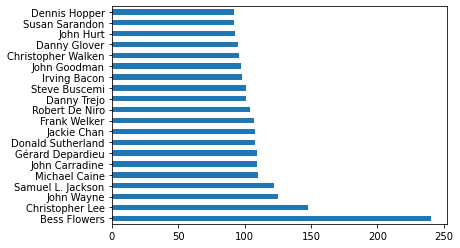

In [74]:
act.actor.value_counts().nlargest(20).plot.barh();

In [75]:
act = act_final.copy()

In [76]:
act

,actor,title,revenue_musd,vote_average,popularity
id,,,,,
5,Tim Roth,Four Rooms,4.30,6.50,9.03
5,Antonio Banderas,Four Rooms,4.30,6.50,9.03
5,Jennifer Beals,Four Rooms,4.30,6.50,9.03
5,Madonna,Four Rooms,4.30,6.50,9.03
5,Marisa Tomei,Four Rooms,4.30,6.50,9.03
...,...,...,...,...,...
443319,Cyd Strittmatter,Phoenix Forgotten,3.60,5.70,12.56
443319,Matt Biedel,Phoenix Forgotten,3.60,5.70,12.56
443319,Ana Dela Cruz,Phoenix Forgotten,3.60,5.70,12.56


In [77]:
agg = act.groupby('actor').agg( Total_revenue = ('revenue_musd','sum') ,
                           Mean_revenue = ('revenue_musd','mean') ,
                           Mean_rating = ('vote_average','mean') ,
                           Mean_popularity = ('popularity','mean') )

agg

,Total_revenue,Mean_revenue,Mean_rating,Mean_popularity
actor,,,,
Frank Nagai,42.00,42.00,6.50,6.16
Larry Mullen Jr.,22.73,22.73,6.70,0.90
Michael Hayden,0.60,0.60,6.20,8.47
"""Lil' Mikey"" Davis",0.28,0.28,5.70,0.90
"""Weird Al"" Yankovic",205.40,34.23,6.12,8.01
...,...,...,...,...
薛立方,84.55,84.55,6.30,2.24
許淑嬪,166.12,83.06,7.00,6.49
长泽雅美,0.35,0.35,7.10,4.77


In [78]:
agg.nlargest(10,'Total_revenue')

,Total_revenue,Mean_revenue,Mean_rating,Mean_popularity
actor,,,,
Stan Lee,19414.96,647.17,6.70,46.45
Samuel L. Jackson,17109.62,213.87,6.42,15.33
Warwick Davis,13256.03,662.80,6.95,19.59
Frank Welker,13044.15,326.10,6.35,17.53
John Ratzenberger,12596.13,449.86,6.85,15.75
Jess Harnell,12234.61,611.73,6.53,15.58
Hugo Weaving,11027.58,459.48,6.73,16.11
Ian McKellen,11015.59,478.94,6.67,25.73
Johnny Depp,10653.76,217.42,6.44,15.80


In [79]:
agg.nlargest(10,'Mean_revenue')

,Total_revenue,Mean_revenue,Mean_rating,Mean_popularity
actor,,,,
April Marie Thomas,2787.97,2787.97,7.20,185.07
Ashley Jeffery,2787.97,2787.97,7.20,185.07
Austin Wilson,2787.97,2787.97,7.20,185.07
Brandon Jelkes,2787.97,2787.97,7.20,185.07
Bravita A. Threatt,2787.97,2787.97,7.20,185.07
Carvon Futrell,2787.97,2787.97,7.20,185.07
Chris Mala,2787.97,2787.97,7.20,185.07
Christa Oliver,2787.97,2787.97,7.20,185.07
Christopher Nolen,2787.97,2787.97,7.20,185.07


In [80]:
agg.nlargest(10,'Mean_rating')

,Total_revenue,Mean_revenue,Mean_rating,Mean_popularity
actor,,,,
Eddie Mills,0.57,0.57,10.00,0.57
Shawn Weatherly,0.57,0.57,10.00,0.57
Kitty Bruce,0.02,0.02,9.50,0.36
Lenny Bruce,0.02,0.02,9.50,0.36
Achala Sachdev,100.00,100.00,9.10,34.46
Anaita Shroff,100.00,100.00,9.10,34.46
Arjun Sablok,100.00,100.00,9.10,34.46
Baby Nupur,100.00,100.00,9.10,34.46
Baby Raashi,100.00,100.00,9.10,34.46


In [81]:
agg.nlargest(10,'Mean_popularity')

,Total_revenue,Mean_revenue,Mean_rating,Mean_popularity
actor,,,,
Alex Dowding,1156.73,1156.73,6.40,547.49
Dave Rosenbaum,1156.73,1156.73,6.40,547.49
Adam Sef,820.58,820.58,7.20,294.34
Alexander Mercury,820.58,820.58,7.20,294.34
Amber Doyle,820.58,820.58,7.20,294.34
Andrea Vasiliou,820.58,820.58,7.20,294.34
Ann Wolfe,820.58,820.58,7.20,294.34
Ben Kelleher,820.58,820.58,7.20,294.34
Betty Adewole,820.58,820.58,7.20,294.34


## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__

In [82]:
df['count'] = 1

In [83]:
df.groupby('director').sum().sort_values(by='count',ascending=False)

,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,rating,count
director,,,,,,,,,,
John Ford,35.62,85.17,2210.00,421.20,201.09,6538.00,1385,694,4.30,66
Michael Curtiz,10.80,37.82,2476.00,341.90,136.98,6281.00,1446,723,1.62,65
Werner Herzog,58.38,24.57,2516.00,367.50,125.11,4086.00,472,543,3.75,54
Alfred Hitchcock,48.67,250.11,12772.00,351.90,344.41,5340.00,1020,775,5.77,53
Woody Allen,396.20,993.97,15512.00,327.90,376.00,4756.00,1232,850,18.31,49
...,...,...,...,...,...,...,...,...,...,...
Jason Zada,10.00,40.06,478.00,4.80,7.38,95.00,31,63,0.25,1
Jasper James,0.00,0.00,11.00,7.30,1.79,180.00,1,2,0.00,1
Javier Aguirre,0.00,0.00,5.00,6.20,0.67,85.00,11,13,0.00,1


In [84]:
df.groupby('director').sum().sort_values(by='revenue_musd',ascending=False)

,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,rating,count
director,,,,,,,,,,
Steven Spielberg,1736.95,9256.62,62266.00,227.50,429.59,4276.00,1072,1624,9.50,33
Peter Jackson,1326.78,6528.24,47571.00,92.80,244.86,1853.00,312,518,17.14,13
Michael Bay,1670.00,6437.47,28767.00,83.10,166.17,1907.00,612,850,4.37,13
James Cameron,760.05,5900.61,33736.00,76.20,308.79,1253.00,383,579,2.41,11
David Yates,1135.00,5334.56,31056.00,60.30,179.89,1293.00,563,180,1.51,9
...,...,...,...,...,...,...,...,...,...,...
Héctor Olivera,0.00,0.00,20.00,18.90,2.57,332.00,30,21,0.00,4
Hélène Fillières,0.00,0.00,10.00,4.40,1.25,80.00,8,3,0.00,1
Héléna Klotz,0.00,0.00,6.00,4.80,2.23,67.00,8,7,0.00,1


In [85]:
df.groupby('director').mean().sort_values(by='rating',ascending=False)

,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size,rating,count
director,,,,,,,,,,
Andy Cadiff,23.00,0.00,60.00,5.83,3.00,97.00,11.00,10.00,1916666.67,1.00
Lance Rivera,16.00,2.90,8.33,5.10,1.17,85.33,12.33,2.67,1333333.33,1.00
Peter Hall,6.40,0.00,10.00,5.85,2.35,103.75,12.50,5.75,1066666.67,1.00
Joe Menendez,4.00,0.00,4.80,5.44,0.92,87.20,10.80,5.00,667052.17,1.00
Christopher Coppola,10.00,0.00,8.50,3.40,0.75,92.00,12.50,9.00,555555.56,1.00
...,...,...,...,...,...,...,...,...,...,...
Ярополк Лапшин,nan,nan,1.00,10.00,0.00,156.00,8.00,6.00,nan,1.00
پیمان معادی,nan,nan,2.00,6.00,0.18,92.00,5.00,2.00,nan,1.00
塩谷 直義,nan,nan,40.00,7.20,4.30,113.00,12.00,9.00,nan,1.00


In [88]:
best_directors = df.groupby('director').agg( Total_revenue = ('revenue_musd','sum') ,
                            Number_of_Movies = ('count','sum') ,
                            Mean_Rating = ('rating','mean') ,
                            Mean_Popularity = ('popularity','mean'))

#### #Total number of movies

In [118]:
best_directors.sort_values(by='Number_of_Movies',ascending=False)

,Total_revenue,Number_of_Movies,Mean_Rating,Mean_Popularity
director,,,,
John Ford,85.17,66,0.43,3.05
Michael Curtiz,37.82,65,0.32,2.11
Werner Herzog,24.57,54,1.88,2.32
Alfred Hitchcock,250.11,53,0.27,6.50
Woody Allen,993.97,49,0.76,7.67
...,...,...,...,...
Jason Zada,40.06,1,0.25,7.38
Jasper James,0.00,1,nan,1.79
Javier Aguirre,0.00,1,nan,0.67


#### #Selection by Total Revenue

In [135]:
best_directors.sort_values(by='Total_revenue',ascending=False)

,Total_revenue,Number_of_Movies,Mean_Rating,Mean_Popularity
director,,,,
Steven Spielberg,9256.62,33,0.32,13.02
Peter Jackson,6528.24,13,1.56,18.84
Michael Bay,6437.47,13,0.34,12.78
James Cameron,5900.61,11,0.30,28.07
David Yates,5334.56,9,0.25,19.99
...,...,...,...,...
Héctor Olivera,0.00,4,nan,0.64
Hélène Fillières,0.00,1,nan,1.25
Héléna Klotz,0.00,1,nan,2.23


#### #Selection by Mean Rating

In [138]:
best_directors.sort_values(by='Mean_Rating',ascending=False)

,Total_revenue,Number_of_Movies,Mean_Rating,Mean_Popularity
director,,,,
Andy Cadiff,0.00,3,1916666.67,3.00
Lance Rivera,5.80,3,1333333.33,1.17
Peter Hall,0.00,4,1066666.67,2.35
Joe Menendez,0.00,5,667052.17,0.92
Christopher Coppola,0.00,2,555555.56,0.75
...,...,...,...,...
Ярополк Лапшин,0.00,1,nan,0.00
پیمان معادی,0.00,1,nan,0.18
塩谷 直義,0.00,1,nan,4.30


## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

In [161]:
stand_alone = df[ df.production_companies.isna() ]

In [162]:
collections = df[ df.production_companies.notna() ]

__Franchise vs. Stand-alone: Average Revenue__

In [172]:
stand_alone.revenue_musd.mean(skipna=True)

4.142588165841584

In [173]:
collections.revenue_musd.mean(skipna=True)

72.7202221399513

In [174]:
# Ratio of average revenue of collections vs stand alone

collections.revenue_musd.mean(skipna=True) / stand_alone.revenue_musd.mean(skipna=True)

17.554296789523583

#### #Quantatie of stand-alone movies

In [186]:
stand_alone['count'] = True

stand_alone['count'].sum()

11335

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [189]:
stand_alone['return'] = stand_alone.budget_musd.div(stand_alone.revenue_musd)

collections['return'] = collections.budget_musd.div(collections.revenue_musd)

<ipython-input-189-c902ababb647>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stand_alone['return'] = stand_alone.budget_musd.div(stand_alone.revenue_musd)
<ipython-input-189-c902ababb647>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collections['return'] = collections.budget_musd.div(collections.revenue_musd)


In [192]:
stand_alone['return'].mean(skipna=True)

1290.2861121764556

In [193]:
collections['return'].mean(skipna=True)

1333.6408249733313

In [194]:
collections['return'].mean(skipna=True) / stand_alone['return'].mean(skipna=True)

1.0336008520805862

__Franchise vs. Stand-alone: Average Budget__

In [197]:
collections['budget_musd'].mean(skipna=True) / stand_alone['budget_musd'].mean(skipna=True)

7.9494063059180124

__Franchise vs. Stand-alone: Average Popularity__

In [198]:
collections['popularity'].mean(skipna=True) / stand_alone['popularity'].mean(skipna=True)

4.088703167673197

__Franchise vs. Stand-alone: Average Rating__

In [201]:
collections['rating'].mean(skipna=True) / stand_alone['rating'].mean(skipna=True)

1.0336008520805862